# <center> 👉 class_06_1 IP » _Binary Img - Thresholding & Otsu's Method_ </center>

## ▶ Binary Image  

A binary image is an image that is rendered in black and white only.  
- Binary: Used when performing a specific operation on the value of a pixel with a high or low value based on a certain point.  
- Change a pixel with a normal high or low value to a value that is black or white.
- It is an operation that divides pixels into true or false by dichotomizing them according to the reference value,   
- Operations are performed on every pixel in the image matrix.   

바이너리 이미지(binary image)란 검은색과 흰색만으로 표현한 이미지를 의미합니다.  
- Binary : 어느 지점을 기준으로 값이 높거나 낮은 픽셀의 값을 대상으로 특정 연산을 수행할 때 사용합니다.  
- 일반적으로 값이 높거나 낮은 픽셀을 검은색 또는 흰색의 값으로 변경합니다.
- 기준값에 따라 이분법적으로 구분해 픽셀을 참 또는 거짓으로 나누는 연산이며,   
- 이미지 행렬에서 모든 픽셀에 대해 연산이 수행됩니다.    
    

In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

src = cv2.imread("./images/practice_img/motorcycle.jpg", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

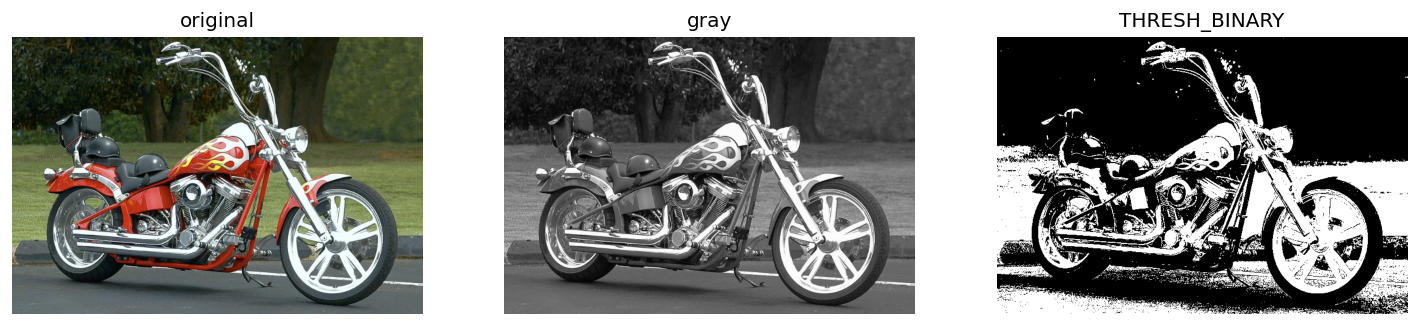

In [2]:
figure(figsize=(15, 10), dpi=120)
plt.subplot(131),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(132),plt.imshow(gray, cmap='gray'),plt.title('gray'),plt.axis('off')
plt.subplot(133),plt.imshow(dst, cmap='gray'),plt.title('THRESH_BINARY'),plt.axis('off')
plt.show()

➡️ Threshold Type 

|type_flag       |Functioning     |Result       |   
|---------------:|:------------------|:---------------- |  
|cv2.THRESH_BINARY|dst = (src > thresh) ? maxval : 0|If the threshold value is exceeded: maxval, if not: 0|
|cv2.THRESH_BINARY_INV|dst = (src > thresh) ? 0 : maxval |If the threshold value is exceeded: 0, if not: maxval|
|cv2.THRESH_TRUNC|dst = (src > thresh) ? thresh : src |If the threshold value is exceeded: thresh, if not: no change|
|cv2.THRESH_TOZERO|dst = (src > thresh) ? src : 0 |If the threshold value is exceeded:no change, if not: 0|
|cv2.THRESH_TOZERO_INV|dst = (src > thresh) ? 0 : src |If the threshold value is exceeded: 0, if not: no change|
|cv2.THRESH_MASK|Change to a black image|for masking|
|cv2.THRESH_OTSU|OTSU algorithm|Applicable to single-channel images only|
|cv2.THRESH_TRIANGLE|TRIANGLE gorithm|Applicable to single-channel images only|

## ▶ Image Thresholding  

Thresholding is a popular segmentation technique, used for separating an object considered as a foreground from its background.  
- In this technique we assign pixel values in relation to the threshold value provided.  
- This technique of thresholding is done on grayscale images, so initially,  
- the image has to be converted in grayscale color space.  
- Here we will discuss two different approaches taken when performing thresholding on an image:  
    
>- Simple Thresholding
>- Adaptive Thresholding  

image thresholding은 가장 단순하고 간단한 image segmentation 방법이다.
- 스레시홀딩은 바이너리 이미지를 만드는 가장 대표적인 방법입니다. 
- 스레시홀딩이란 여러 값을 어떤 임계점을 기준으로 두 가지 부류로 나누는 방법을 의미합니다.
>- 어떤 임계값을 정한 뒤 픽셀 값이 임계값을 넘으면 255, 임계값을 넘지 않으면 0으로 지정하는 방식을 스레시홀딩이라고 합니다.  
>- 이런 작업은 간단하게 numpy로 연산할 수 있지만, OpenCV에서 cv2.threshold() 함수로 구현할 수도 있습니다.   

### ● Simple Thresholding:  

In this basic Thresholding technique, for every pixel, the same threshold value is applied.   
- If the pixel value is smaller than the threshold, it is set to a certain value(usually zero),   
- otherwise, it is set to another value(usually maximum value).  
- There are various variations of this technique as shown below.

In OpenCV, we use cv2.threshold function to implement it. 

이 함수는 두 개의 결과를 반환하는데 
- 첫 번째 결과인 ret은 스레시홀딩에 사용한 임계값이고 (threshold 파라미터로 전달한 값과 동일), 
- 두번째 결과인 out은 스레시홀딩이 적용된 바이너리 이미지입니다. 

Syntax:

>**cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)**  

Parameters:

- source: Input Image array (must be in Grayscale).
- thresholdValue: Value of Threshold below and above which pixel values will change accordingly.
- maxVal: Maximum value that can be assigned to a pixel.
- thresholdingTechnique: The type of thresholding to be applied.Here are various types of thresholding we can use
>- cv2.THRESH_BINARY: If  the pixel intensity is greater than the threshold, the pixel value is set to 255(white), else it is set to 0 (black).
>- cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.If  the pixel intensity is greater than the threshold, the pixel value is set to 0(black), else it is set to 255 (white).
>- cv.THRESH_TRUNC: If the pixel intensity is greater than the threshold, the pixel values are set to be the same as the threshold. All other values remain the same.
>- cv.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value. All other pixel values remain same
>- cv.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

In [3]:
# threshold.py

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) 

thresh_np = np.zeros_like(img)   # Numpy Img with zero
thresh_np[img > 127] = 255      # Change values greater than 127 to 255

ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Create a binary image with the OpenCV API
print(ret)  

127.0


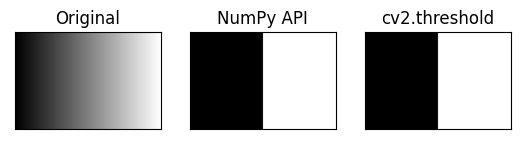

In [4]:
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

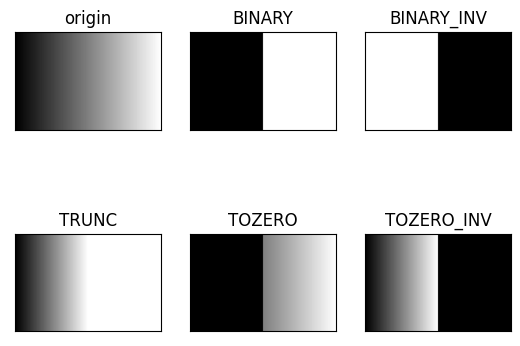

In [5]:
# threshold_flag.py : showing thresholding flags

import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()

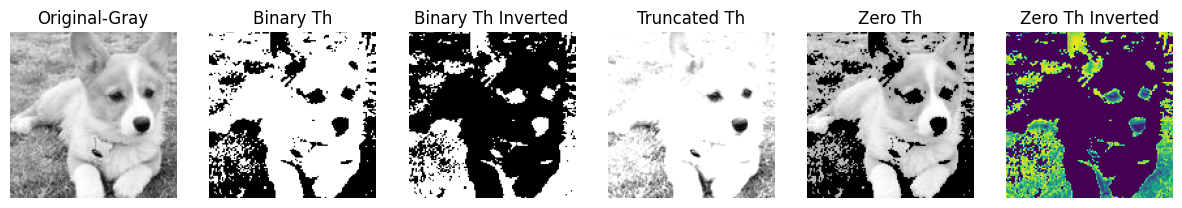

In [6]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
  
img = cv2.imread('./images/dogs/02.jpg', -1) 

# to convert the image in grayscale  
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
threshold=160
ret, thresh1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY) 
ret, thresh2 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV) 
ret, thresh3 = cv2.threshold(img, threshold, 255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO) 
ret, thresh5 = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO_INV) 
  
# the window showing output images with the corresponding thresholding techniques applied to the input images 
fig, axs = plt.subplots(1,6,figsize=(15,15))
axs[0].imshow(img,cmap='gray'), axs[0].axis('off'), axs[0].set_title('Original-Gray')
axs[1].imshow(thresh1,cmap='gray'), axs[1].axis('off'), axs[1].set_title('Binary Th')
axs[2].imshow(thresh2,cmap='gray'), axs[2].axis('off'), axs[2].set_title('Binary Th Inverted')
axs[3].imshow(thresh3,cmap='gray'), axs[3].axis('off'), axs[3].set_title('Truncated Th')
axs[4].imshow(thresh4,cmap='gray'), axs[4].axis('off'), axs[4].set_title('Zero Th')
axs[5].imshow(thresh5,cmap='gray'), axs[5].axis('off'), axs[5].set_title('Zero Th Inverted')

plt.imshow(img),plt.imshow(thresh1),plt.imshow(thresh2),plt.imshow(thresh3),plt.imshow(thresh4),plt.imshow(thresh5)

plt.show()

### ● Adaptive Thresholding   
In simple thresholding, the threshold value was global which means it was same for all the pixels in the image.   
- But this may not be the best approach for thresholding as the different image sections can have different lightings.   

Thus we need Adaptive thresholding,   
- which is the method where the threshold value is calculated for smaller regions and therefore,   
- there will be **different threshold values for different regions.**

In OpenCV we have adaptiveThreshold() function to implement this type of thresholding.   

위에서 설명한 전역 스레시홀딩이 매번 좋은 성능을 내는 것은 아닙니다. 
원본 이미지에서 조명이 일정하지 않거나 배경색이 여러 개인 경우에는 하나의 임계값으로 선명한 바이너리 이미지를 만들어내기 힘들 수도 있습니다. 
이때는 이미지를 여러 영역으로 나눈 뒤, 그 주변 픽셀 값만 활용하여 임계값을 구해야 하는데, 이를 적응형 스레시홀딩(Adaptive Thresholding)이라고 합니다.   
개발자가 정해준 임의의 값이 아닌 블럭사이즈내에서 구할 수 있기 때문에 더 유연하게 Threshold를 적용할 수 있음.  
- 적응형 이진화 알고리즘은 입력 이미지에 따라 임곗값이 스스로 다른 값을 할당할 수 있도록 구성된 이진화 알고리즘입니다.  
- 이미지에 따라 어떠한 임곗값을 주더라도 이진화 처리가 어려운 이미지가 존재합니다.
- 예를 들어, 조명의 변화나 반사가 심한 경우 이미지 내의 밝기 분포가 달라 국소적으로 임곗값을 적용해야 하는 경우가 있습니다.  
- 이러한 경우 적응형 이진화 알고리즘을 적용한다면 우수한 결과를 얻을 수 있습니다.

~ Syntax:  

>**cv2.adaptiveThreshold(src, dst, maxValue, adaptiveMethod, thresholdType, blockSize, C)**  

~ Parameters:  

- src − An object of the class Mat representing the source (input) image.
- dst − An object of the class Mat representing the destination (output) image.
- maxValue − A variable of double type representing the value that is to be given if pixel value is more than the threshold value.
- adaptiveMethod − A variable of integer the type representing the adaptive method to be used. This will be either of the following two values:
>- cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.   
>>- 이웃 픽셀의 평균값에서 보정값(C)을 뺀값을 임계값으로 결정  
>>- blockSize 영역의 모든 픽셀에 평균 가중치를 적용
>- cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.   
>>- 가우시안 분포에 따른 가중치의 합에서 보정값(C)을 뺀값을 임계값으로 결정  
>>- blockSize 영역의 모든 픽셀에 중심점으로부터의 거리에 대한 가우시안 가중치 적용
>- thresholdType: A variable of integer type representing the type of threshold to be used. (cv2.threshod()와 동일)
- blockSize: A variable of the integer type representing size of the pixelneighborhood used to calculate the threshold value. 임계처리에 적용할 영역크기(n x n), 블럭의 중심으로 홀수값
- C: A variable of double type representing the constant used in the both methods (subtracted from the mean or weighted mean) 계산된 임계값 결과에서 가감할 상수(양수:계산된 adaptive 임계값에 +, 음수: 계산된 adaptive 임계값에 –)
>- Block size and C (subtraction) are utilized in formulas for calculating the result.
> $$ T(x,y) = \frac{1}{blockSize^2}\sum_{x_i}\sum_{y_i}I(x + x_i, \ y + y_i) - C $$
>- blockSize can only be odd so that there can be a center point. 
>- The C typically uses positive values, but in some cases it can also use 0 or negative numbers.
>- The larger the blockSize, the longer the computation will take.    
    
➡️ There are two types of flags, but there are three ways to calculate them.
- a mean-weighted, a gaussian-weighted, a mixing method.
- Mixing uses the average weight and the Gaussian weight to calculate use OR
>- cv2.ADAPTIVE_THRESH_MEAN_C | cv2.ADAPTIVE_THRESH_GAUSSIAN_C   

Example:   

In [13]:
import cv2

src = cv2.imread("./images/practice_img/tree1.webp")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 355, 35)

cv2.imshow("binary", binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

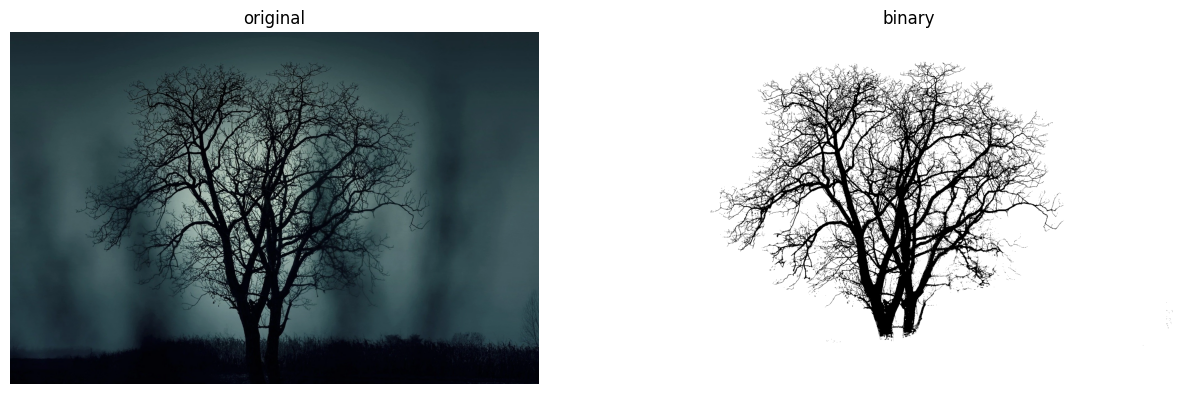

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(binary,'gray'),plt.title('binary'),plt.axis('off')
plt.show()

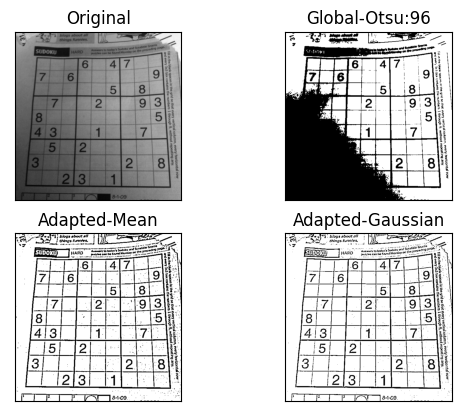

In [10]:
# threshold_adapted

import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        
C = 5               
img = cv2.imread('./images/practice_img/sudoku.png', cv2.IMREAD_GRAYSCALE) 

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # OTSU's algorithm applies a single boundary value to the entire image
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

The top right is a binary image with global thresholding applied through Oates' algorithm.
- The bottom left is black,
- The upper right corner has turned white, making the image more difficult to discern.

This phenomenon occurs in that the bottom left of the original image is darker and darker than the top right.
This is a typical problem that occurs when using global thresholding.
However, the two binary images below with adaptive thresholding applied are quite sharp.
- Using the mean value (Adapted-Mean) is clearer than using the Gaussian distribution (Adapted-Gaussian), but there are some blemishes.
- On the other hand, using the Gaussian distribution has slightly lower clarity than using the average value, but has fewer blemishes.

오른쪽 상단은 오츠의 알고리즘을 통해 전역 스레시홀딩을 적용한 바이너리 이미지입니다. 
- 왼쪽 아래는 검정색으로, 
- 오른쪽 위는 흰색으로 변해 이미지를 식별하기가 더 어려워졌습니다. 

원본 이미지 좌측 하단이 우측 상단보다 더 그늘지고 어두워 발생하는 현상입니다. 
전역 스레시홀딩을 하면 발생하는 전형적인 문제점입니다. 
하지만 적응형 스레시홀딩을 적용한 아래 두 바이너리 이미지는 상당히 선명합니다. 
- 평균값(Adapted-Mean)을 활용한 것이 가우시안 분포(Adapted-Gaussian)을 활용한 것보다 더 선명한데 그만큼 잡티가 조금 있습니다. 
- 반면, 가우시안 분포를 활용한 것은 평균값을 활용한 것에 비해 선명도는 조금 떨어지지만 잡티가 더 적습니다.

The adaptive thresholding algorithm for the example above is as follows:
- First, set a total of 9 blocks in the entire image. You can think of it as dividing the image into 9 parts.
- Next, set a threshold for each block. At this time,
>- Passing cv2.ADAPTIVE_THRESH_MEAN_C as a parameter sets the threshold to the average of the neighboring pixels of each block.
>- If cv2.ADAPTIVE_THRESH_GAUSSIAN_C is passed as a parameter, the threshold is determined by the sum of weights according to Gaussian distribution.

Thresholding is performed for each block based on a set threshold. Doing so can produce sharper and smoother results than applying global thresholding.
Most images have shadows or lighting differences. Therefore, adaptive thresholding is used more than global thresholding.

위 예제의 적응형 스레시홀딩 알고리즘은 다음과 같습니다. 
- 우선, 전체 이미지에 총 9개의 블록을 설정합니다. 이미지를 9등분 한다고 보시면 됩니다. 
- 그 다음 각 블록별로 임계값을 정합니다. 이때, 
>- cv2.ADAPTIVE_THRESH_MEAN_C를 파라미터로 전달하면 각 블록의 이웃 픽셀의 평균으로 임계값을 정합니다. 
>- cv2.ADAPTIVE_THRESH_GAUSSIAN_C를 파라미터로 전달하면 가우시안 분포에 따른 가중치의 합으로 임계값을 정합니다. 

정해진 임계값을 바탕으로 각 블록별로 스레시홀딩을 합니다. 그렇게 하면 전역 스레시홀딩을 적용한 것보다 더 선명하고 부드러운 결과를 얻을 수 있습니다.  
대부분의 이미지는 그림자가 있거나 조명 차이가 있습니다. 따라서 전역 스레시홀딩보다 적응형 스레시홀딩을 더 많이 사용합니다. 

### ● Otsu's binarization method  

The most important thing when creating a binary image is how to set the threshold.
In 1979, Nobuyuki Otsu found a way to find the threshold in one go without repeated attempts.
This is Otsu's binarization method.
Oates' algorithm randomly sets a threshold, divides pixels into two groups, and repeatedly calculates the intensity distribution of the two groups.
Among all the possible cases, select the threshold at which the intensity distribution of the two classes is most uniform.
                    
In the example below, you can see that the image is sharpest when the threshold is between 120 and 140.

바이너리 이미지를 만들 때 가장 중요한 점은 임계값을 얼마로 정하냐 하는 것입니다.   
1979년 오츠 노부유키는 반복적인 시도 없이 한 번에 임계값을 찾을 수 있는 방법을 찾아냈습니다.   
이것이 바로 오츠의 이진화 알고리즘(Otsu's binarization method)입니다.   
오츠의 알고리즘은 임계값을 임의로 정해 픽셀을 두 부류로 나누고 두 부류의 명암 분포를 구하는 작업을 반복합니다.   
모든 경우의 수 중에서 두 부류의 명암 분포가 가장 균일할 때의 임계값을 선택합니다. 
                    
아래 예제에서는 임계값이 120~140 사이일 때 이미지가 가장 선명하다는 것을 알 수 있습니다.

<img src = './images/practice_img/otsu.png' width=600 height=400>  
                    

### ● Thresholding by Otsu
Converting to binary is done using a ceratin threshold. E.g. you can say, all pixels with gray > 125 will become white, the others black.   
There are several thresholding algorithm out there, but maybe the most common is Otsu.   
You can find it here Thresholding by Otsu

OpenCV 함수를 활용하면 오츠의 알고리즘을 적용할 수 있습니다. 

cv2.threshold() 함수의 마지막 파라미터로 cv2.THRESH_OTSU를 전달하기만 하면 됩니다. 
오츠의 알고리즘은 최적의 임계값을 찾아주므로 cv2.threshold() 함수에 전달하는 threshold 파라미터는 아무 값이어도 상관없습니다. 
어차피 무시되기 때문입니다.

아래는 오츠의 알고리즘을 활용하여 최적의 임계값을 찾는 예제 코드입니다.

In [11]:
# threshold_otsu

import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('./images/practice_img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력

otsu threshold: 131.0


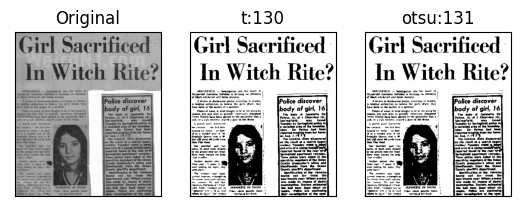

In [12]:
imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

The text in the original image is not clear.
However, when converted to a binary image, the text became clearer.
- The original image is on the far left,
- The second image is a binary image with a threshold of 130,
- The third image is a binary image using Otsu’s algorithm.
- According to Otsu’s algorithm, the optimal threshold is 131.

This code applies Oates’ algorithm.

t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
- The second parameter, -1, is a value that conveys the threshold.
- In Otsu's algorithm, this value is ignored, so you can enter any value.
- Otsu's algorithm has the advantage of automatically finding the optimal threshold, but
- It also has the disadvantage of not being fast because all cases must be investigated.  

원본 이미지의 글씨는 선명하지 않습니다.   
하지만 바이너리 이미지로 변환하니 글씨가 좀 더 선명해졌습니다. 
- 맨 왼쪽은 원본 이미지,   
- 두 번째 이미지는 임계값을 130으로 지정해준 바이너리 이미지,   
- 세 번째 이미지는 오츠의 알고리즘을 적용한 바이너리 이미지입니다.   
- 오츠의 알고리즘에 따르면 최적의 임계값은 131 임을 알 수 있습니다.   

오츠의 알고리즘을 적용하는 코드입니다.

t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU)     
- 두 번째 파라미터인 -1은 threshold를 전달하는 값입니다.
- 오츠의 알고리즘에서는 이 값은 무시되므로 아무 값이나 넣어도 상관없습니다.  
- 오츠의 알고리즘이 최적의 임계값을 자동으로 찾아준다는 장점이 있지만,   
- 모든 경우의 수에 대해 조사해야 하므로 속도가 빠르지 않다는 단점도 있습니다.

## 👉 Comparision 

In [15]:
# All
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

src = cv2.imread("./images/practice_img/motorcycle.jpg", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, th1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # 131
ret, th2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(gray, 100, 255, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO_INV) 

cv2.imshow("Org", src)
cv2.imshow("Gray", gray)
cv2.imshow("BINARY", th1)
cv2.imshow("BINARY_INV", th2)
cv2.imshow("TRUNC", th3)
cv2.imshow("TOZERO", th4)
cv2.imshow("TOZERO_INV", th5)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
blk_size = 9        # 블럭 사이즈 11
C = 5               # 차감 상수 0

th_otu, th6 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
th7 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th8 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)
print('otsu threshold:', th_otu) 

otsu threshold: 131.0


In [17]:
cv2.imshow("OTSU", th6)
cv2.imshow("ADAPTIVE_MEAN", th7)
cv2.imshow("ADAPTIVE_GAUSSIAN", th8)
cv2.waitKey()
cv2.destroyAllWindows()

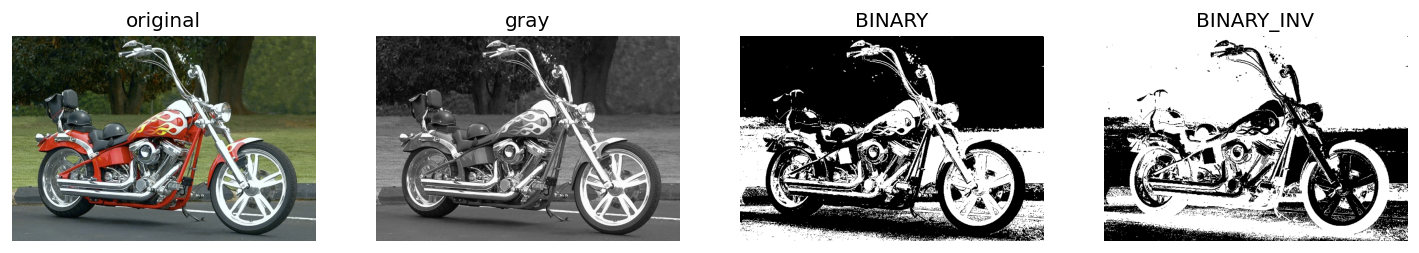

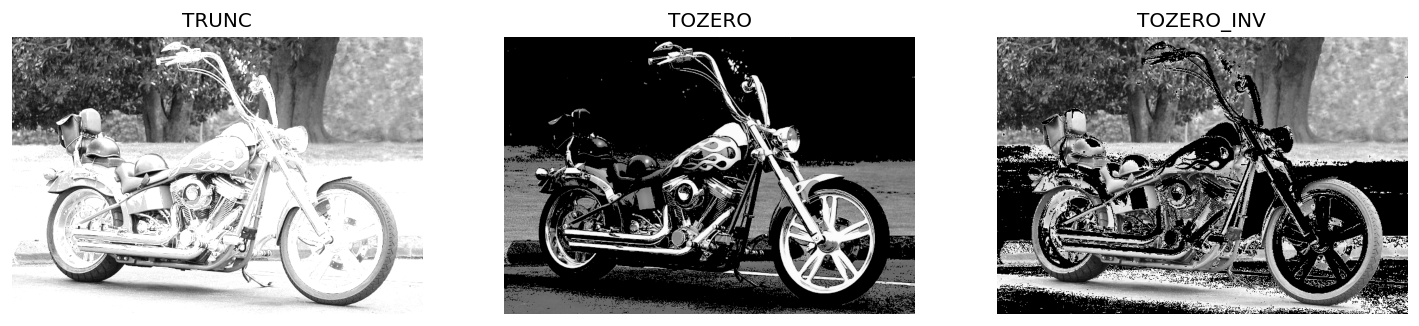

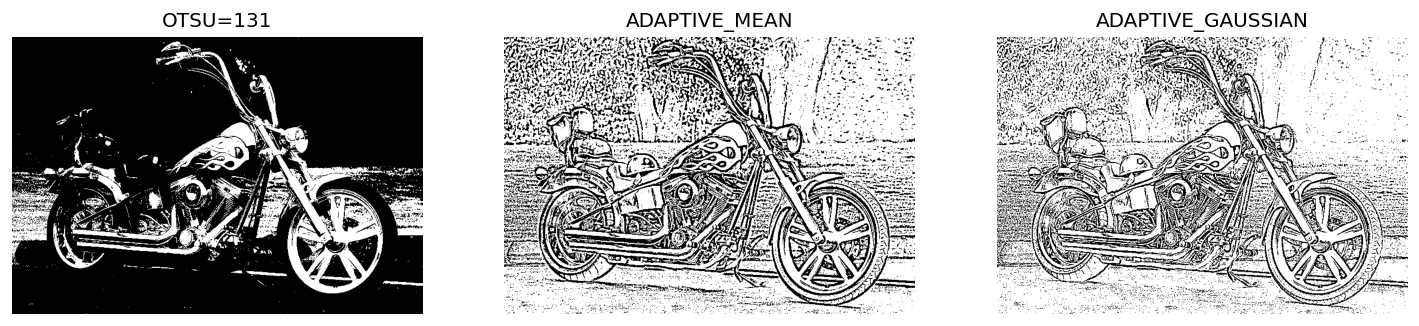

In [25]:
figure(figsize=(15, 10), dpi=120)
plt.subplot(141),plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(142),plt.imshow(gray, cmap='gray'),plt.title('gray'),plt.axis('off')
plt.subplot(143),plt.imshow(th1, cmap='gray'),plt.title('BINARY'),plt.axis('off')
plt.subplot(144),plt.imshow(th2, cmap='gray'),plt.title('BINARY_INV'),plt.axis('off')
plt.show()

figure(figsize=(15, 15), dpi=120)

plt.subplot(131),plt.imshow(th3, cmap='gray'),plt.title('TRUNC'),plt.axis('off')
plt.subplot(132),plt.imshow(th4, cmap='gray'),plt.title('TOZERO'),plt.axis('off')
plt.subplot(133),plt.imshow(th5, cmap='gray'),plt.title('TOZERO_INV'),plt.axis('off')
plt.show()

figure(figsize=(15, 15), dpi=120)

plt.subplot(131),plt.imshow(th6, cmap='gray'),plt.title('OTSU=131'),plt.axis('off')
plt.subplot(132),plt.imshow(th7, cmap='gray'),plt.title('ADAPTIVE_MEAN'),plt.axis('off')
plt.subplot(133),plt.imshow(th8, cmap='gray'),plt.title('ADAPTIVE_GAUSSIAN'),plt.axis('off')

plt.show()

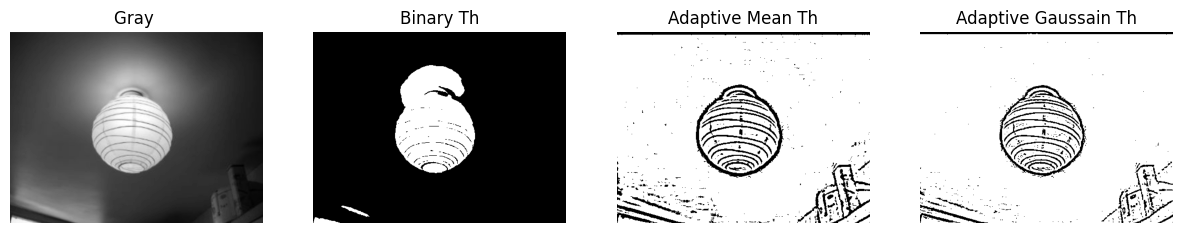

In [18]:
import cv2  
import numpy as np  
  
img = cv2.imread('./images/light.png', -1) 

# to convert the image in grayscale  
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

ret, th1 = cv2.threshold(img_gr,160, 255, cv2.THRESH_BINARY) 
th2 = cv2.adaptiveThreshold(img_gr,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img_gr,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

fig, axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img_gr, cmap='gray'), axs[0].axis('off'), axs[0].set_title('Gray ')
axs[1].imshow(th1, cmap='gray'), axs[1].axis('off'), axs[1].set_title('Binary Th')
axs[2].imshow(th2, cmap='gray'), axs[2].axis('off'), axs[2].set_title('Adaptive Mean Th')
axs[3].imshow(th3, cmap='gray'), axs[3].axis('off'), axs[3].set_title('Adaptive Gaussain Th')
plt.show()